In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("HyperRPNNs.jl")
include("HyperECNNs.jl")
rng = MersenneTwister(0);

In [2]:
MarkerList = ["o","s","v","^",">","<"];
LineStyleList = ["solid","dashed","solid","dashed","solid","dashed"];

In [3]:
function imnoise(img,noise_std = 0.1)
    return clamp.(img + noise_std*randn(rng, Float64, size(img)),0,1)
end

imnoise (generic function with 2 methods)

In [4]:
function plotseq(Sequence,ind,N)
    ### Convergence Ratio ###
    
    num_elements = length(Sequence)
    
    #print(size(Sequence[1]))
    
    Sequencia_c = zeros(Complex,N,num_elements)
    
    for i=1:num_elements
        Sequencia_c[:,i] = Sequence[i][:,1]+im*Sequence[i][:,2]
    end
    
    Convergence_rate = zeros(num_elements-1,1)
    
    for j=1:num_elements-1
       Convergence_rate[j] = norm(Sequencia_c[:,j+1]-Sequencia_c[:,j])/norm(Sequencia_c[:,j+1])
    end
    
    c1 = 0
    k = ind
    if k>6
        c1 = c1+1
        k = c1
    end
    
    c2 = 0
    v = ind
    if v>6
        c2 = c2+1
        v = c2
    end 
    
    return k,v,Convergence_rate,num_elements
end

plotseq (generic function with 1 method)

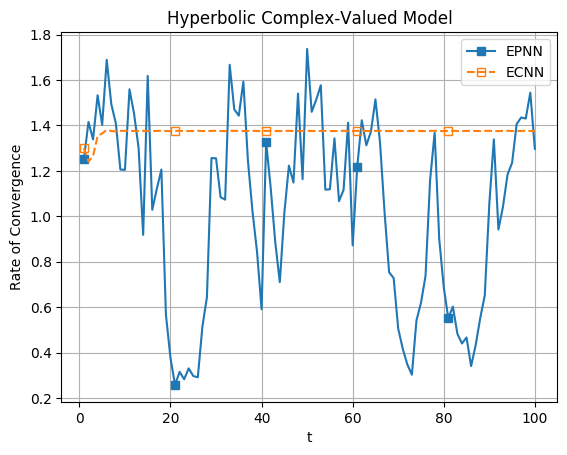

8.267267301413277
Hypercomplex RPNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
N = 100
P = 160
K = 256

alpha = 10
beta = -10

MultiStates = exp.(2*pi*collect(0:K-1)*im/K)
U=zeros(N,2,P)

Uc = rand(rng,MultiStates,(N,P))
U[:,1,:] = real.(Uc)
U[:,2,:] = imag.(Uc)

img = U[:,:,1]
xcopy = copy(img)

for i =2:2    
    
    noise = 0.33*i
    
    x = imnoise(img,noise)
    
    # verificando o adicionamento de ruido
    println(norm(xcopy-x))

    y, Sequence  = HyperRPNNs.Sync(HyperRPNNs.LambdaInner,[1,-1],HyperRPNNs.csign,K,U,x,alpha,beta,  100)
    y, Sequence2 = HyperECNNs.Sync(HyperECNNs.LambdaInner,[1,-1],HyperECNNs.csign,K,U,x,alpha/N,beta,  100)
    

    k,v,Convergence_rate,num_elements = plotseq(Sequence,i,N)
    k2,v2,Convergence_rate2,num_elements2 = plotseq(Sequence2,i,N)
    
    #println(Convergence_rate)
    
    plot(collect(1:num_elements-1),Convergence_rate, linestyle = LineStyleList[1], marker = MarkerList[k], markevery=20, label = "EPNN")
    plot(collect(1:num_elements2-1),Convergence_rate2, linestyle = LineStyleList[2], marker = MarkerList[k], markevery=20,  mfc="none",  label = "ECNN")
end
xlabel("t")
ylabel("Rate of Convergence")
title("Hyperbolic Complex-Valued Model")
legend()
grid()
savefig("Figures/Conv_rate_HvComplexRPNN.eps")
savefig("Figures/Conv_rate_HvComplexRPNN.pdf")